<a href="https://colab.research.google.com/github/Darshan235/ML/blob/main/ML_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression using Scikit-learn (Step-wise Output)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Load dataset
df = pd.read_csv('Salary_dataset.csv')
df


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:

# 2. Split data into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (24, 2)
Testing size: (6, 2)


In [4]:

# 3. Import and create LinearRegression model
model = LinearRegression()


In [5]:

# 4. Train the model
model.fit(X_train, y_train)

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)


Slope: [ -852.62599488 12045.97955622]
Intercept: 22452.27202479432


In [6]:

# 5. Predict output values
y_pred = model.predict(X_test)

print("Predicted values:")
print(y_pred)


Predicted values:
[116277.37185839  69892.77988271 102823.5044592   73005.91971544
  55382.99660129  60553.36038452]


In [7]:

# 6. Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 55494098.13142202


In [8]:

# 7. Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)


R-squared value: 0.8913575982179497


In [9]:

# 8. Interpret model accuracy
print("Model explains", round(r2*100, 2), "% of the variance in salary")


Model explains 89.14 % of the variance in salary


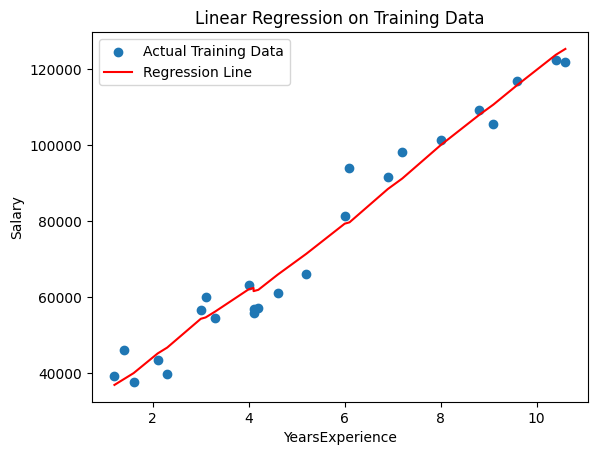

In [12]:

# 9. Plot regression line (training data)
# Scatter plot of actual training data
plt.scatter(X_train[:, 1], y_train, label='Actual Training Data')

# To plot the regression line, we need sorted values of YearsExperience.
# We predict on the original X_train, then sort based on YearsExperience for plotting.
x_plot = X_train[:, 1] # YearsExperience
y_plot_pred = model.predict(X_train)

# Create an array of (YearsExperience, Predicted_Salary) pairs and sort them by YearsExperience
plot_data = np.column_stack((x_plot, y_plot_pred))
plot_data_sorted = plot_data[plot_data[:, 0].argsort()]

plt.plot(plot_data_sorted[:, 0], plot_data_sorted[:, 1], color='red', label='Regression Line')
plt.xlabel("YearsExperience") # Update xlabel for clarity
plt.ylabel("Salary")
plt.title("Linear Regression on Training Data") # Add a title
plt.legend() # Add a legend
plt.show()


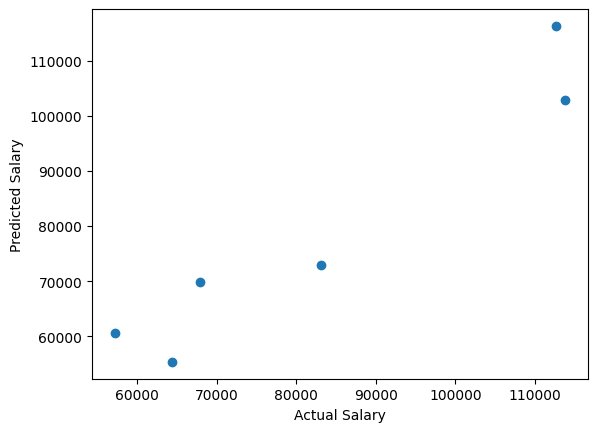

In [11]:

# 10. Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()



### Interpretation
- High R² value indicates good model accuracy  
- Predictions closely match actual salaries  
- Linear model fits the dataset well
